<a href="https://colab.research.google.com/github/Seongpo/TFLearn/blob/master/tensorflow03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

x_data = [[1,2,1], [1,3,2], [1,3,4], [1,5,5], [1,7,5], [1,2,5], [1,6,6], [1,7,7]]
y_data = [[0,0,1], [0,0,1], [0,0,1], [0,1,0], [0,1,0], [0,1,0], [1,0,0], [1,0,0]]

x_test = [[2,1,1], [3,1,2], [3,3,4]]
y_test = [[0,0,1], [0,0,1], [0,0,1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])
W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

hypothesis = tf.nn.softmax(tf.matmul(X,W)+b)
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict = {X:x_data, Y:y_data})
        print(step, cost_val, W_val)
        
    print("Prediction:", sess.run(prediction, feed_dict={X:x_test}))
    print("Accuracy:", sess.run(accuracy, feed_dict={X:x_test, Y:y_test}))

In [0]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Epoch: 0001 cost  =  2.872559054
Epoch: 0002 cost  =  1.121559674
Epoch: 0003 cost  =  0.882330672
Epoch: 0004 cost  =  0.767528795
Epoch: 0005 cost  =  0.696925961
Epoch: 0006 cost  =  0.646821055
Epoch: 0007 cost  =  0.608378495
Epoch: 0008 cost  =  0.578764726
Epoch: 0009 cost  =  0.553712915
Epoch: 0010 cost  =  0.533250408
Epoch: 0011 cost  =  0.515848463
Epoch: 0012 cost  =  0.500793716
Epoch: 0013 cost  =  0.487121431
Epoch: 0014 cost  =  0.475606425
Epoch: 0015 cost  =  0.465318061
Label: [4]
Prediction [4]


<function matplotlib.pyplot.show>

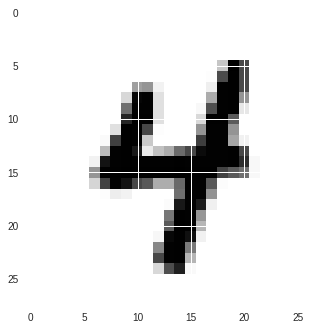

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

nb_classes = 10
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

hypothesis = tf.nn.softmax(tf.matmul(X,W)+b)

cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

is_correct = tf.equal(tf.argmax(hypothesis,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32)) 


training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict = {X:batch_xs, Y:batch_ys})
            avg_cost +=c /total_batch
            
        print('Epoch:', '%04d'%(epoch +1), 'cost  = ', '{:.9f}'.format(avg_cost))
        
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction", sess.run(tf.argmax(hypothesis, 1), feed_dict = {X:mnist.test.images[r:r+1]}))

plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation = 'nearest')
plt.show
        

In [0]:
with tf.Session() as sess:
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction", sess.run(tf.argmax(hypothesis, 1), feed_dict = {X:mnist.test.images[r:r+1]}))

plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation = 'nearest')
plt.show

Label: [1]


FailedPreconditionError: ignored